# HAMLET

In [2]:
import pandas as pds
import os
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
def count_words_fast(text):
    '''
    Count the number of times each word occurs in the text (str).
    Return a dictionnay where keys are unique words and values are
    word counts. Skip punctuation.
    '''
    # 1st lower case all the words
    text = text.lower()
    # 2nd, skip words:
    skips = [".",",",";",":","''",'"',"!","?"]
    for ch in skips:
        text = text.replace(ch, "")

    word_counts = Counter(text.split(" "))

    return word_counts

def read_book(title_path):
    '''
    Read a book and return it as a string.
    '''
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

def word_stats(word_counts):
    '''
    Return number of unique words and word frequencies
    '''
    num_unique = len(word_counts)
    counts = word_counts.values()
    return(num_unique, counts)

## Exercise 1

- Write a function word_count_distribution(text) that takes a book string
  and returns a dictionary with items corresponding to the count of times
  a collection of words appears in the translation, and values corresponding
  to the number of number of words that appear with that frequency.
- First use count_words_fast(text) to create a dictionary called word_counts
  with unique words in the dictionary as keys and their frequency in the
  book as values.
- Next, create and return a new dictionary count_distribution with unique
  values from word_counts as keys and their frequency as values. For example,
  'you are what you eat' contains three words that occur once and one word
  that occurs twice, so word_count_distribution('you are what you eat')
  should return a dictionary {1:3, 2:1}.
- 'Romeo and Juliet' is [stored in Hamlet/Books/English directory. Load it
  as text using read_book]. Call word_count_distribution(text), and save the
  result as distribution.


### Solution 1

In [4]:
def word_count_distribution(text):
    '''
    Returns a dictionnary which takes as keys the frequency of each independent
    word from the text argument, and key values the frequency of the key in the
    text. It makes use of count_words_fast(text) function.
    '''
    word_counts = count_words_fast(text)

    count_distribution = {}
    for word in word_counts:
        if word_counts[word] in count_distribution:
            count_distribution[word_counts[word]] += 1
        else:
            count_distribution[word_counts[word]] = 1
    return count_distribution

### Solution 2

In [5]:
def word_count_distribution(text):
    '''
    Returns a dictionnary which takes as keys the frequency of each independent
    word from the text argument, and key values the frequency of the key in the
    text. It makes use of count_words_fast(text) function.
    '''
    word_counts = count_words_fast(text)

    count_distribution = Counter()
    for freq in word_counts.values():
        count_distribution[freq] += 1

    return count_distribution

### Solution 3

In [6]:
def word_count_distribution(text):
    '''
    Returns a dictionnary which takes as keys the frequency of each independent
    word from the text argument, and key values the frequency of the key in the
    text. It makes use of count_words_fast(text) function.
    '''
    word_counts = count_words_fast(text)

    count_distribution = Counter(word_counts.values())

    return count_distribution

In [8]:
text = read_book("./hamlet/books/English/shakespeare/Romeo and Juliet.txt")
distribution = word_count_distribution(text)
print(distribution)

Counter({1: 2854, 2: 687, 3: 302, 4: 170, 5: 134, 6: 82, 7: 70, 9: 43, 10: 39, 8: 34, 11: 29, 12: 25, 14: 21, 13: 21, 15: 17, 17: 12, 19: 12, 23: 10, 26: 10, 21: 10, 16: 10, 20: 9, 18: 9, 25: 7, 45: 6, 24: 5, 27: 5, 64: 4, 29: 4, 68: 4, 22: 4, 28: 4, 52: 3, 41: 3, 32: 3, 31: 3, 87: 3, 54: 3, 47: 3, 57: 3, 60: 2, 82: 2, 112: 2, 148: 2, 51: 2, 36: 2, 30: 2, 70: 2, 46: 2, 44: 2, 163: 2, 33: 2, 61: 2, 53: 2, 49: 2, 56: 2, 39: 2, 97: 2, 40: 2, 67: 1, 527: 1, 138: 1, 777: 1, 126: 1, 369: 1, 253: 1, 833: 1, 12183: 1, 356: 1, 240: 1, 266: 1, 137: 1, 610: 1, 286: 1, 110: 1, 88: 1, 189: 1, 504: 1, 166: 1, 279: 1, 360: 1, 35: 1, 142: 1, 58: 1, 374: 1, 74: 1, 65: 1, 96: 1, 134: 1, 79: 1, 100: 1, 80: 1, 568: 1, 359: 1, 83: 1, 229: 1, 277: 1, 260: 1, 154: 1, 135: 1, 139: 1, 111: 1, 130: 1, 59: 1, 164: 1, 103: 1, 76: 1, 37: 1, 120: 1, 50: 1, 66: 1, 71: 1, 38: 1, 153: 1, 42: 1, 113: 1, 48: 1, 117: 1, 62: 1, 34: 1})


## Exercise 2

- Create a function more_frequent(distribution) that takes a word
  frequency dictionary (like that made in Exercise 1) and outputs a
  dictionary with the same keys as those in distribution (the number of
  times a group of words appears in the text), and values corresponding to
  the fraction of words that occur with more frequency than that key.
- Call more_frequent(distribution)

In [10]:
def more_frequent(distribution):
    frequent = {}
    sorted_dist = distribution.most_common()
    for i in range(len(sorted_dist)):
        more_frequent = 0
        for j in range(i + 1, len(sorted_dist)):
            more_frequent += sorted_dist[j][1]
        frequent[sorted_dist[i][0]] = more_frequent
    return frequent

In [12]:
print(more_frequent(distribution))

{1: 1922, 2: 1235, 3: 933, 4: 763, 5: 629, 6: 547, 7: 477, 9: 434, 10: 395, 8: 361, 11: 332, 12: 307, 14: 286, 13: 265, 15: 248, 17: 236, 19: 224, 23: 214, 26: 204, 21: 194, 16: 184, 20: 175, 18: 166, 25: 159, 45: 153, 24: 148, 27: 143, 64: 139, 29: 135, 68: 131, 22: 127, 28: 123, 52: 120, 41: 117, 32: 114, 31: 111, 87: 108, 54: 105, 47: 102, 57: 99, 60: 97, 82: 95, 112: 93, 148: 91, 51: 89, 36: 87, 30: 85, 70: 83, 46: 81, 44: 79, 163: 77, 33: 75, 61: 73, 53: 71, 49: 69, 56: 67, 39: 65, 97: 63, 40: 61, 67: 60, 527: 59, 138: 58, 777: 57, 126: 56, 369: 55, 253: 54, 833: 53, 12183: 52, 356: 51, 240: 50, 266: 49, 137: 48, 610: 47, 286: 46, 110: 45, 88: 44, 189: 43, 504: 42, 166: 41, 279: 40, 360: 39, 35: 38, 142: 37, 58: 36, 374: 35, 74: 34, 65: 33, 96: 32, 134: 31, 79: 30, 100: 29, 80: 28, 568: 27, 359: 26, 83: 25, 229: 24, 277: 23, 260: 22, 154: 21, 135: 20, 139: 19, 111: 18, 130: 17, 59: 16, 164: 15, 103: 14, 76: 13, 37: 12, 120: 11, 50: 10, 66: 9, 71: 8, 38: 7, 153: 6, 42: 5, 113: 4, 4

## Exercise 3

- Edit the code used to read through each of the books in our library, and store the word frequency distribution for each translation of William Shakespeare's "Hamlet" as a Pandas dataframe hamlets with columns named "language" and "distribution". word_count_distribution is preloaded from Exercise 1. How many translations are there? Which languages are they translated into?

In [13]:
def clean_subdir(of_dir):
    '''
    Returns a list of the subdirectories of the_dir without the
    hidden file which starts with "." in mac osX.
    '''
    return [f for f in os.listdir(of_dir) if not f.startswith(".")]

In [14]:
hamlets = pds.DataFrame(columns=("language", "distribution"))
# book_dir = "Books"
book_dir = "./hamlet/books"
title_num = 1

for language in clean_subdir(book_dir):
    for author in clean_subdir(book_dir + "/" + language):
        for title in clean_subdir(book_dir + "/" + language + "/" + author):
            if title == "Hamlet.txt":
                inputfile = book_dir + "/" + language + "/" + author + "/" + \
                            title
                # inputfile = data_filepath+"Books/"+language+"/"+author+"/"+\
                #             title+".txt"
                text = read_book(inputfile)
                distribution = word_count_distribution(text)
                hamlets.loc[title_num] = language, distribution
                title_num += 1
hamlets
# There are three translations: English, German, and Portuguese.

,language,distribution
1,German,"{1: 7379, 17: 12, 261: 1, 2: 873, 56: 1, 372: ..."
2,English,"{855: 1, 2: 647, 550: 1, 1: 5180, 8: 29, 601: ..."
3,Portuguese,"{1: 7231, 200: 1, 5: 132, 707: 1, 664: 1, 20: ..."


## Exercise 4

- Plot the word frequency distributions of each translations on a single
  log-log plot. Note that we have already done most of the work for you.
  Do the distributions of each translation differ?

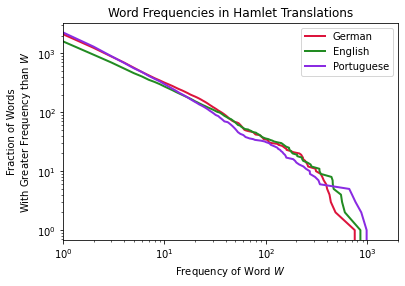

In [19]:
colors = ["crimson", "forestgreen", "blueviolet"]
handles, hamlet_languages = [], []
for index in range(hamlets.shape[0]):
    language, distribution = hamlets.language[index+1], \
                             hamlets.distribution[index+1]
    dist = more_frequent(distribution)
    plot, = plt.loglog(sorted(list(dist.keys())),\
                       sorted(list(dist.values()),reverse = True), \
                       color = colors[index], linewidth = 2)
    handles.append(plot)
    hamlet_languages.append(language)
plt.title("Word Frequencies in Hamlet Translations")
xlim    = [1, 2e3]
xlabel  = "Frequency of Word $W$"
ylabel  = "Fraction of Words\nWith Greater Frequency than $W$"
plt.xlim(xlim); plt.xlabel(xlabel); plt.ylabel(ylabel)
plt.legend(handles, hamlet_languages, loc = "upper right", numpoints = 1)
plt.show()
